<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd

df = pd.read_csv('./Apart Deal.csv', encoding='cp949')

df.head(-10)
# 거래금액(단위: 만 원), 전용면적(단위: m^2)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,2020-05-30 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,2020-01-03 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,2020-01-03 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,2020-01-03 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,2020-01-04 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...,...
1048560,50110,삼도이동,2018-10-05 0:00,삼도파크빌,1105,77.7800,7,2003,22000
1048561,50110,삼도이동,2018-10-07 0:00,JNC패밀리II,830-9,31.2400,4,2013,8500
1048562,50110,삼도이동,2018-10-10 0:00,JNC패밀리3차,14-7,84.6437,2,2013,29300
1048563,50110,삼도이동,2018-10-22 0:00,동인스파월드빌,1241-14,106.4700,9,2004,24000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   지역코드    1048575 non-null  int64  
 1   법정동     1048575 non-null  object 
 2   거래일     1048575 non-null  object 
 3   아파트     1048575 non-null  object 
 4   지번      1048445 non-null  object 
 5   전용면적    1048575 non-null  float64
 6   층       1048575 non-null  int64  
 7   건축년도    1048575 non-null  int64  
 8   거래금액    1048575 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 72.0+ MB


In [ ]:
# 데이터 개수
df.shape

(1048575, 9)

In [ ]:
# 상관계수 출력
df.corr()

<ipython-input-6-53a991b9d765>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,지역코드,전용면적,층,건축년도,거래금액
지역코드,1.000000,-0.042967,-0.003927,0.109562,-0.365677
전용면적,-0.042967,1.000000,0.157110,0.237324,0.504040
층,-0.003927,0.157110,1.000000,0.290463,0.194911
건축년도,0.109562,0.237324,0.290463,1.000000,0.204880
거래금액,-0.365677,0.504040,0.194911,0.204880,1.000000


In [ ]:
# 1m^2 = 0.3025평
df['평수'] = df['전용면적'] * 0.3025

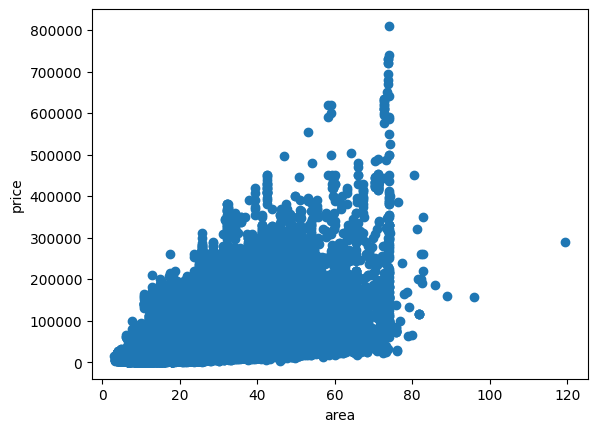

In [ ]:
import matplotlib.pyplot as plt

# 평수, 거래금액 산점도
plt.scatter(df['평수'], df['거래금액'])
plt.xlabel('area')
plt.ylabel('price')

plt.show()

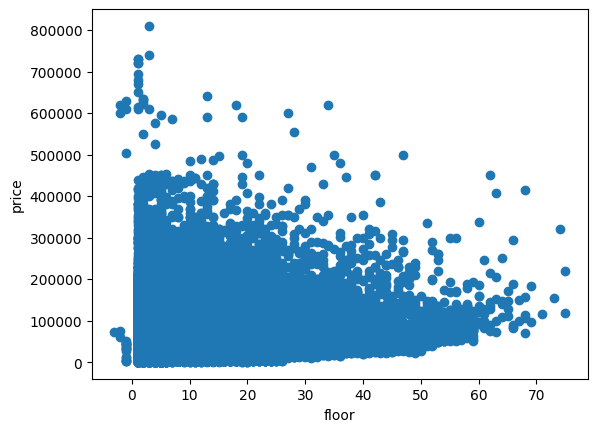

In [ ]:
# 층, 거래금액 산점도
plt.scatter(df['층'], df['거래금액'])
plt.xlabel('floor')
plt.ylabel('price')

plt.show()

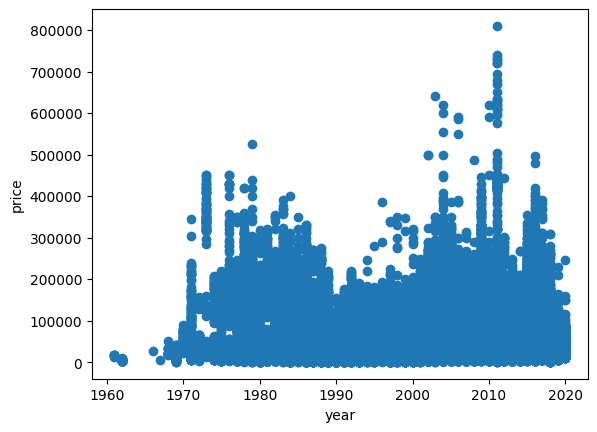

In [ ]:
# 건축년도, 거래금액 산점도
plt.scatter(df['건축년도'], df['거래금액'])
plt.xlabel('year')
plt.ylabel('price')

plt.show()

In [ ]:
X = df[['평수', '층', '건축년도']]
y = df['거래금액']

X.head()

,평수,층,건축년도
0,41.012950,8,1991
1,30.734000,2,2006
2,25.710080,11,2007
3,35.908565,8,2006
4,25.701489,7,2007


In [ ]:
# 피처 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled[:5])

[[ 2.25029688 -0.21290769 -1.22547032]
 [ 0.94499694 -1.15925048  0.37634997]
 [ 0.30702103  0.26026371  0.48313799]
 [ 1.60210291 -0.21290769  0.37634997]
 [ 0.30593008 -0.37063149  0.48313799]]


In [ ]:
# 표준화된 넘파이 배열들로 데이터프레임 만들기
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

df_scaled.head()

,평수,층,건축년도
0,2.250297,-0.212908,-1.225470
1,0.944997,-1.159250,0.376350
2,0.307021,0.260264,0.483138
3,1.602103,-0.212908,0.376350
4,0.305930,-0.370631,0.483138


In [ ]:
print(df_scaled.columns)

Index(['평수', '층', '건축년도'], dtype='object')


In [ ]:
# 이상치 제거하기
import scipy as sp
import scipy.stats



In [ ]:
# 할 일
# 1-1. train, target 추리기
# 1-2. 피처 표준화하기
# 1-3. 피처 이상치 제거하기(zscore)
# 1-4. 피처 정규화하기
# 2. 모델 선정하기
# 3. 학습하기
# 4. 테스트 하기